<a href="https://www.kaggle.com/code/nagachanduchandu/devanagiri-character-classification-using-mlp?scriptVersionId=115948904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt




In [2]:


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [3]:
data=pd.read_csv('/kaggle/input/devanagari1/data.csv')

In [4]:
data.shape

(92000, 1025)

In [5]:
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [6]:
X=data.drop("character",axis=1)


In [7]:
Y=data["character"]

In [8]:
X.shape,Y.shape

((92000, 1024), (92000,))

In [9]:
# split the data into train and test.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(73600, 1024)
(73600,)
(18400, 1024)
(18400,)


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [14]:
y_train

array([44, 16, 16, ..., 38,  0,  7])

In [15]:
from tensorflow. keras.utils import to_categorical

In [16]:
y_train=to_categorical(y_train,num_classes=46)
y_test=to_categorical(y_test,num_classes=46)

In [17]:
x_train

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
89775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
x_train/=255
x_test/=255

In [20]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [21]:
x_train

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
89775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Building a simple MLP network.

In [23]:
model=tf.keras.models.Sequential()


model.add(keras.layers.Dense(512,input_shape=(1024,),
                            activation="relu"))

model.add(keras.layers.Dropout(0.4))# add dropouts to make the model model generalize to test data(reduce overfitting)
model.add(keras.layers.Dense(512,
                            name="dense_layer_2",activation="relu")),
model.add(keras.layers.Dropout(0.4))# add dropouts to make the model model generalize to test data(reduce overfitting)
model.add(keras.layers.Dense(46,
                              name="dense_layer_3",activation="softmax"))

2023-01-10 01:04:45.949965: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 46)                23598     
Total params: 811,054
Trainable params: 811,054
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [26]:
history=model.fit(x_train,y_train,
                 epochs=30,
                 batch_size=512,
                 verbose=1,
                 validation_split=0.2)

2023-01-10 01:04:46.417931: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
115/115 [==============================] - 4s 30ms/step - loss: 1.8522 - accuracy: 0.5002 - val_loss: 0.9197 - val_accuracy: 0.7490
Epoch 2/30
115/115 [==============================] - 3s 26ms/step - loss: 0.9587 - accuracy: 0.7265 - val_loss: 0.6000 - val_accuracy: 0.8355
Epoch 3/30
115/115 [==============================] - 3s 27ms/step - loss: 0.7044 - accuracy: 0.7948 - val_loss: 0.4637 - val_accuracy: 0.8719
Epoch 4/30
115/115 [==============================] - 3s 27ms/step - loss: 0.5731 - accuracy: 0.8296 - val_loss: 0.3919 - val_accuracy: 0.8918
Epoch 5/30
115/115 [==============================] - 3s 27ms/step - loss: 0.4897 - accuracy: 0.8533 - val_loss: 0.3434 - val_accuracy: 0.9004
Epoch 6/30
115/115 [==============================] - 3s 28ms/step - loss: 0.4366 - accuracy: 0.8699 - val_loss: 0.3057 - val_accuracy: 0.9120
Epoch 7/30
115/115 [==============================] - 4s 32ms/step - loss: 0.3797 - accuracy: 0.8856 - val_loss: 0.2714 - val_accuracy: 0.9232

In [27]:
acc,loss=model.evaluate(x_test,y_test)

575/575 [==============================] - 2s 3ms/step - loss: 0.1691 - accuracy: 0.9529


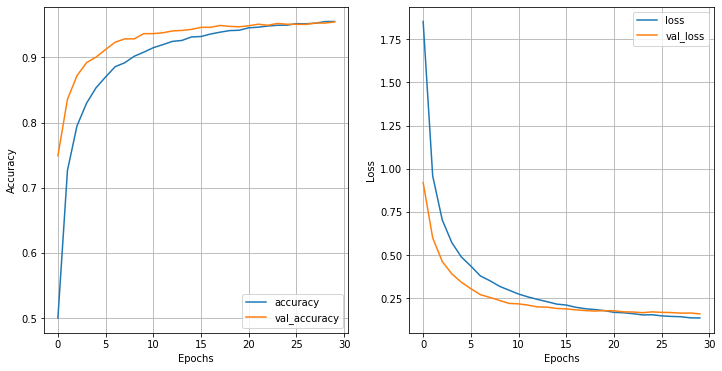

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [29]:
#The accuracy acheived here is 95% using Multilayer perceptron.eventhough if you try out different optimjzation parametres,the accuracy is not 
#going to improve much,but the model gets more complexity(more trainable parametres.) but there will be no more significant improvement.  

In [30]:
#so,if you want a model with more accuracy, you need to change the perspective of the model.The reason that we cannot improve the above models performance is, 
#here we are not considering the images local spatial structure(we are flattening the original matrix and sending it to the network),so we are missing the local 
#spatial information of the image.so, using convolution layers will improve the model accuracy.